# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

# Define The Problem

#### 1) Predicting which booking is likely to be canceled. 
#### 2) Identifying factors that have a high influence on booking cancellations.
#### 3) Formulate reccomendations for reducing cancellations, or reducing sunk cost resulting from cancellations.


## Importing necessary libraries and data

In [1]:
# Warning filter
import warnings
warnings.filterwarnings("ignore")

# data manipulation libraries for Python
import pandas as pd
import numpy as np

# data visualisation libraires for Python
import matplotlib.pyplot as plt
import seaborn as sns

# statistical libraries for Python
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# prediction libraries for Python (Train/Test + Tree)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
) 
# disable display column & row limits
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)


In [2]:
# upload and create aq clean copy of the data

innrec = pd.read_csv('INNHotelsGroup.csv')
data = innrec.copy()

## Data Overview

- Observations
- Sanity checks

### Take a first look at the data 

In [3]:
# view first five rows of data
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [4]:
# view last five rows of data
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [5]:
# I get the same random results every time
np.random.seed(1)
data.sample(n=50)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
30392   INN30393             1               0                     1   
6685    INN06686             2               0                     1   
8369    INN08370             2               0                     2   
2055    INN02056             2               0                     0   
10969   INN10970             1               0                     2   
24881   INN24882             2               0                     3   
28658   INN28659             2               0                     0   
20853   INN20854             2               0                     1   
8501    INN08502             2               0                     0   
1942    INN01943             2               0                     0   
15648   INN15649             2               0                     2   
6116    INN06117             2               0                     0   
7868    INN07869             2               0                     2   
24527   INN24528             2               0                     0   
24227   INN24228             2               0                     1   
17216   INN17217             2               0                     0   
31124   INN31125             1               0                     0   
9101    INN09102             1               0                     2   
9474    INN09475             2               0                     0   
12782   INN12783             2               0                     0   
28297   INN28298             1               0                     2   
22021   INN22022             2               0                     0   
26586   INN26587             3               0                     2   
16756   INN16757             2               0                     1   
20927   INN20928             2               0                     2   
35753   INN35754             2               0                     1   
9359    INN09360             1               0                     1   
21929   INN21930             1               0                     0   
17501   INN17502             2               0                     0   
3355    INN03356             2               1                     2   
22183   INN22184             1               0                     0   
7818    INN07819             2               0                     0   
26360   INN26361             2               0                     0   
15193   INN15194             2               0                     0   
19873   INN19874             2               0                     0   
8015    INN08016             1               1                     0   
36151   INN36152             2               0                     2   
21254   INN21255             1               0                     1   
16881   INN16882             2               0                     1   
9465    INN09466             2               0                     2   
18785   INN18786             1               0                     0   
28097   INN28098             2               0                     1   
29239   INN29240             1               0                     0   
664     INN00665             2               1                     1   
8285    INN08286             2               0                     2   
4598    INN04599             2               0                     1   
21340   INN21341             2               2                     0   
12098   INN12099             2               0                     1   
2904    INN02905             2               0                     0   
21902   INN21903             2               0                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
30392                  0      Not Selected                           0   
6685                   2       Meal Plan 1                           0   
8369                   3       Meal Plan 1                           0   
2055                   2      Not Sel

In [6]:
# view the size of the data set
data.shape

(36275, 19)

In [7]:
# view the data types of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
# check for duplicate values
data[data.duplicated()].count()


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
# checking for NUll values... data is complete!!!
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
# drop the 'Booking ID' columns from the data set. 
data = data.drop('Booking_ID', axis=1)

In [11]:
# view what are the values in object data types
cat_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


#### Observations
- 36275 entries (rows) of 19 data points (columns) with no missing or duplicated data, leading me to believe that this is a well managed data set.
- 5 columns are object data sets, however one is the Booking_ID (which I already discarded). 3 will need to be 'OneHotEncoded'(type_of_meal_plan, room_type_observed, and market_segement_type). The last is 'booking_status' which is the testing result and is boolean (only two options), however not True/ False in type so will have to deal with that. 

In [12]:
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

In [13]:
data.describe(include = ['object'])

type_of_meal_plan room_type_reserved market_segment_type booking_status
count              36275              36275               36275          36275
unique                 4                  7                   5              2
top          Meal Plan 1        Room_Type 1              Online   Not_Canceled
freq               27835              28130               23214          24390

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
  
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [17]:
labeled_barplot(data, 'arrival_month', perc=True, n=None)

In [18]:
labeled_barplot(data, 'market_segment_type', perc=True, n=None)

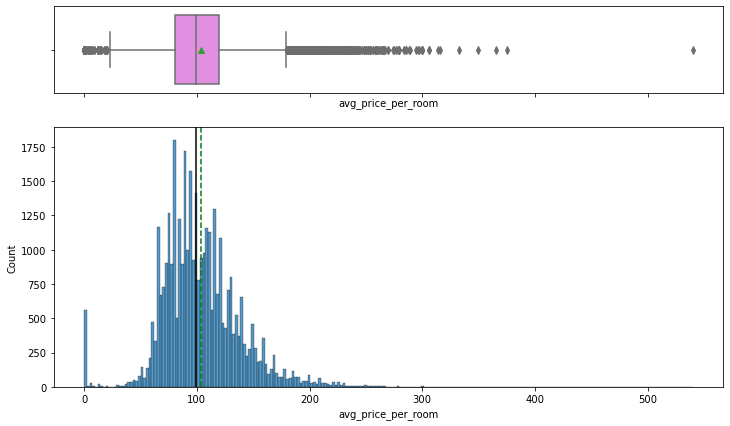

In [19]:
histogram_boxplot(data, 'avg_price_per_room')

In [136]:
# how many free rooms does the hotel give away?
data[data['avg_price_per_room']==0] 

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0                 0.0   
145                                       5                 0.0   
209                                       0                 0.0   
266                                       1                 0.0   
267                                       0                 0.0   
...                                     ...                 ...   
35983                         

In [21]:
data.loc[data['avg_price_per_room']==0, 'market_segment_type'].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

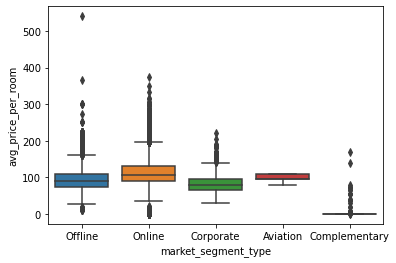

In [22]:
sns.boxplot(data=data, y='avg_price_per_room' , x='market_segment_type')

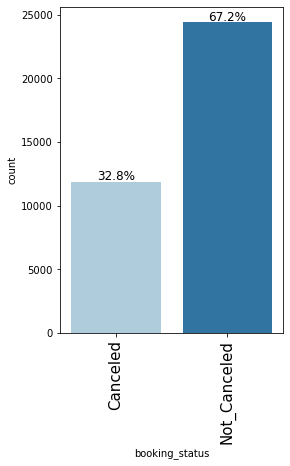

In [23]:
labeled_barplot(data, 'booking_status', perc=True, n=None)

In [24]:
stacked_barplot(data,'repeated_guest','booking_status')

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


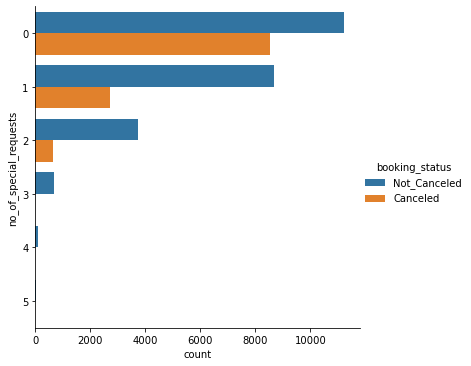

In [25]:
sns.catplot(data=data, y='no_of_special_requests', hue='booking_status', kind='count' )


**Leading Questions Answered**:
1. What are the busiest months in the hotel? 
    
    **Month 10 = October with 14.7% of the total booking for the year.**
    
2. Which market segment do most of the guests come from?
    
    **Online 23214 or 64% of the bookings come via the internet.**
    
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

    **Online booking are the highest despite also having the highest amount of free rooms (I suppose they are redeemed from online retailers points systems) Aviation, Offline, and Corporate are generally slightly lower priced with Corporate edging out for the lowest. Complimentary are of course free.** 

4. What percentage of bookings are canceled? 
    
    **about 1/3 (11885) of bookings are canceled in the sample data.**
    
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

    **Repeating guest rarely cancel (1.75%).**

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
   
   **The absence of special request increases the likelihood of cancellation, the addition of special request begins to reduce the likelihood of cancellation at one and progressively reduces cancellation to Zero on the instance of a third request.**

**Univariate**

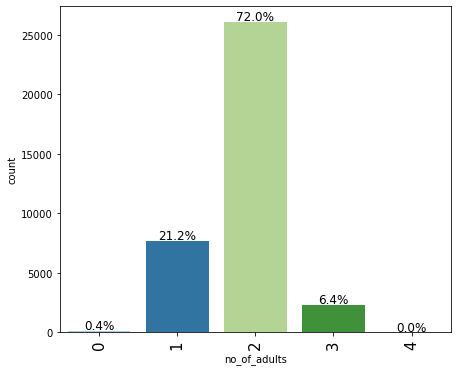

In [26]:
labeled_barplot(data, 'no_of_adults', perc=True)

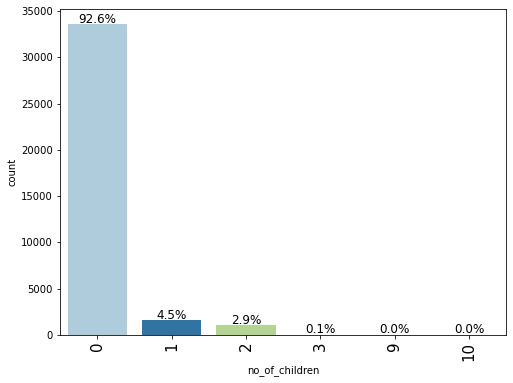

In [27]:
labeled_barplot(data, 'no_of_children', perc=True)

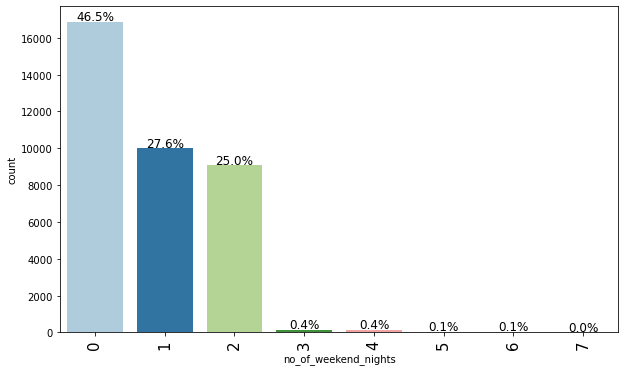

In [28]:
labeled_barplot(data, 'no_of_weekend_nights', perc=True)

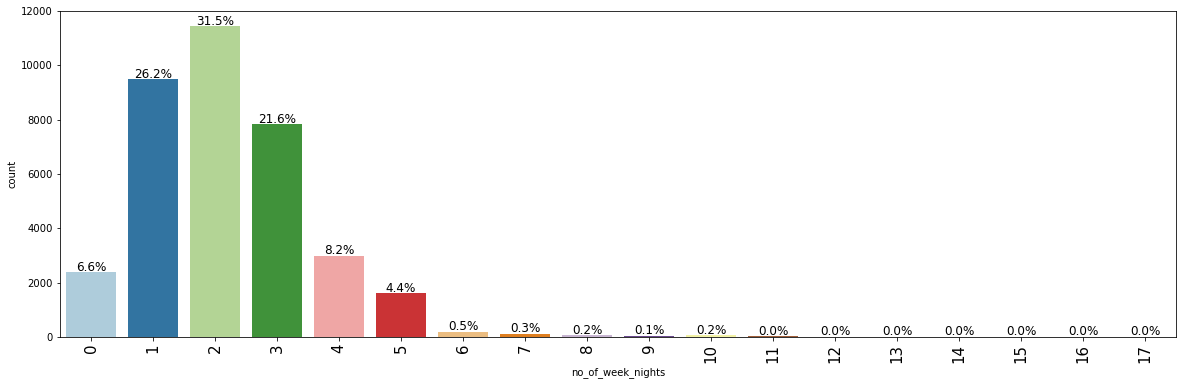

In [29]:
labeled_barplot(data, 'no_of_week_nights', perc=True)

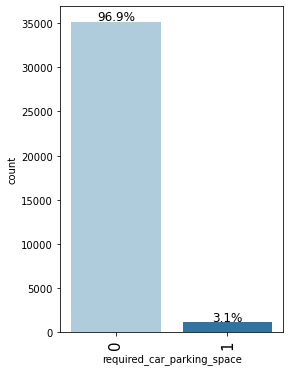

In [30]:
labeled_barplot(data, 'required_car_parking_space', perc=True)

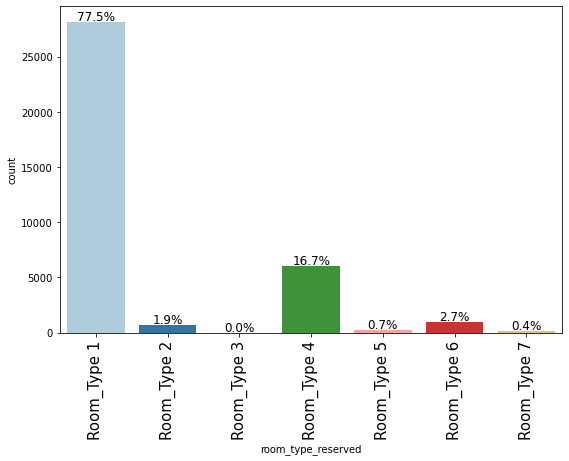

In [31]:
labeled_barplot(data, 'room_type_reserved', perc=True)

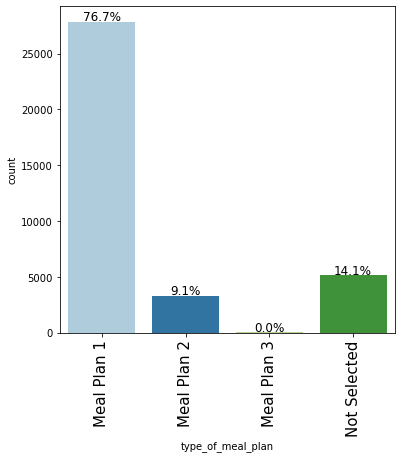

In [32]:
labeled_barplot(data, 'type_of_meal_plan', perc=True)

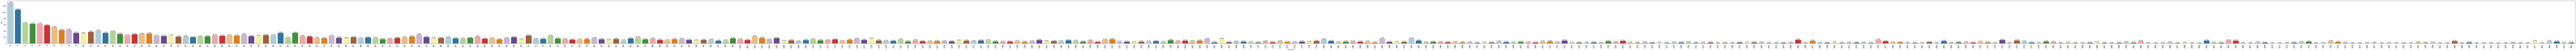

In [33]:
labeled_barplot(data, 'lead_time', perc=True)

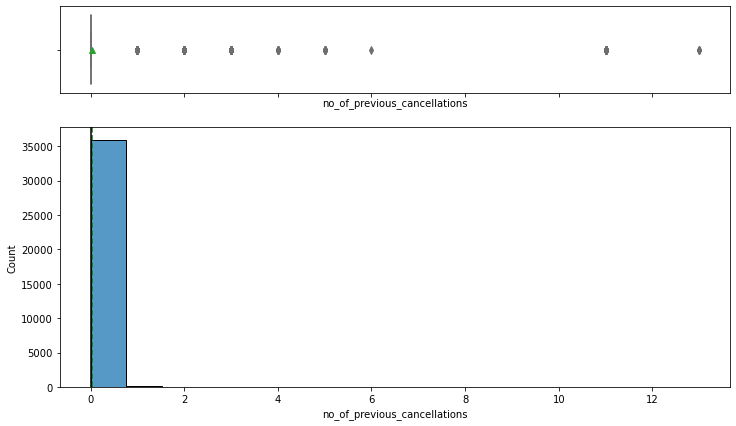

In [34]:
histogram_boxplot(data, 'no_of_previous_cancellations')

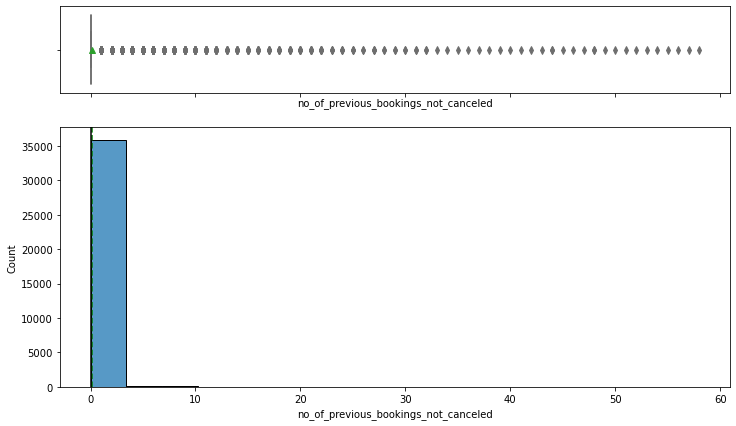

In [35]:
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

<AxesSubplot:>

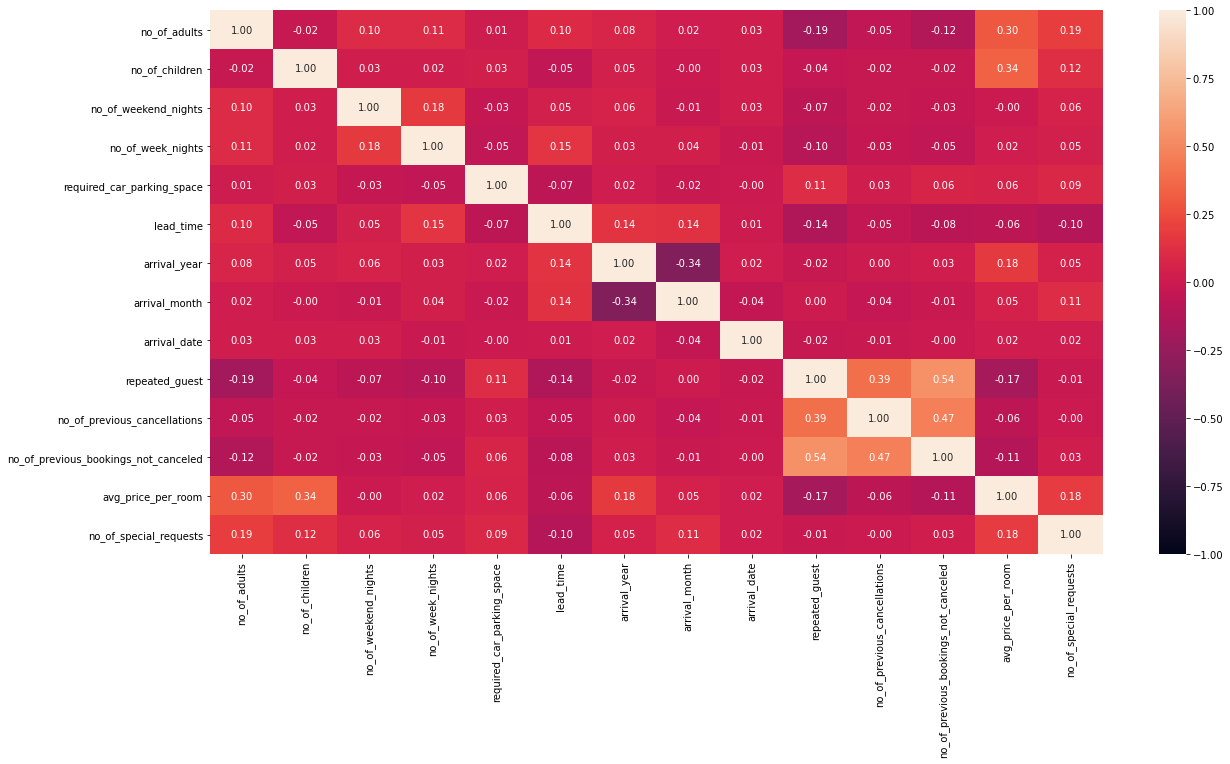

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(
data.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

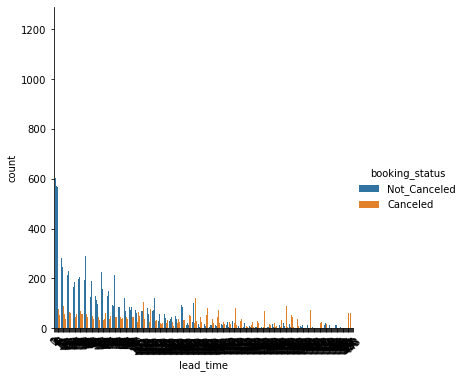

In [37]:
# how does lead time effect cancellation
sns.catplot(data=data, x='lead_time', hue='booking_status', kind='count' )
plt.xticks(rotation=45)
plt.show()

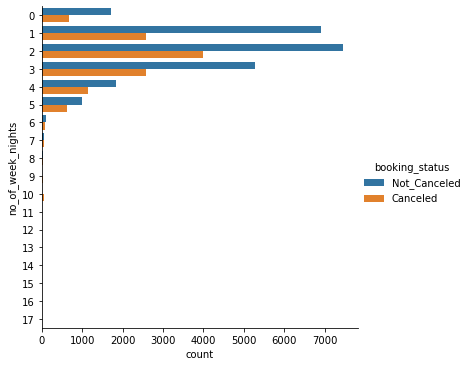

In [38]:
# do weekends v weekday have differnt patterns on cancelation?
sns.catplot(data=data, y='no_of_week_nights', hue='booking_status', kind='count' )
plt.show()

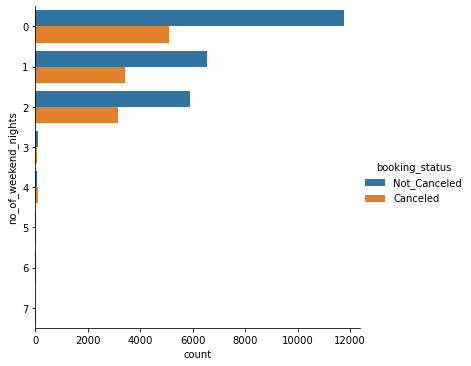

In [39]:
sns.catplot(data=data, y='no_of_weekend_nights', hue='booking_status', kind='count' )
plt.show()

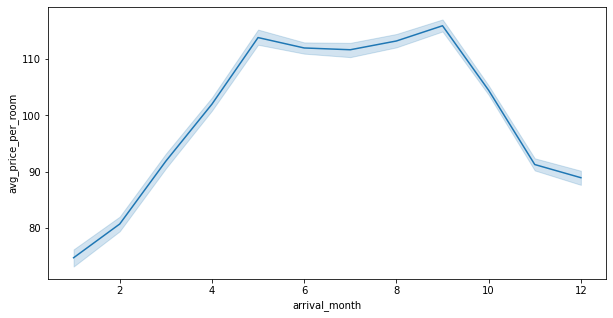

In [40]:
# having established that some months are busier than others, does priceing for that demand exist in the data? 
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='arrival_month', y='avg_price_per_room')
plt.show()

In [41]:
# New column for lenght of stay
data['length_stay'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

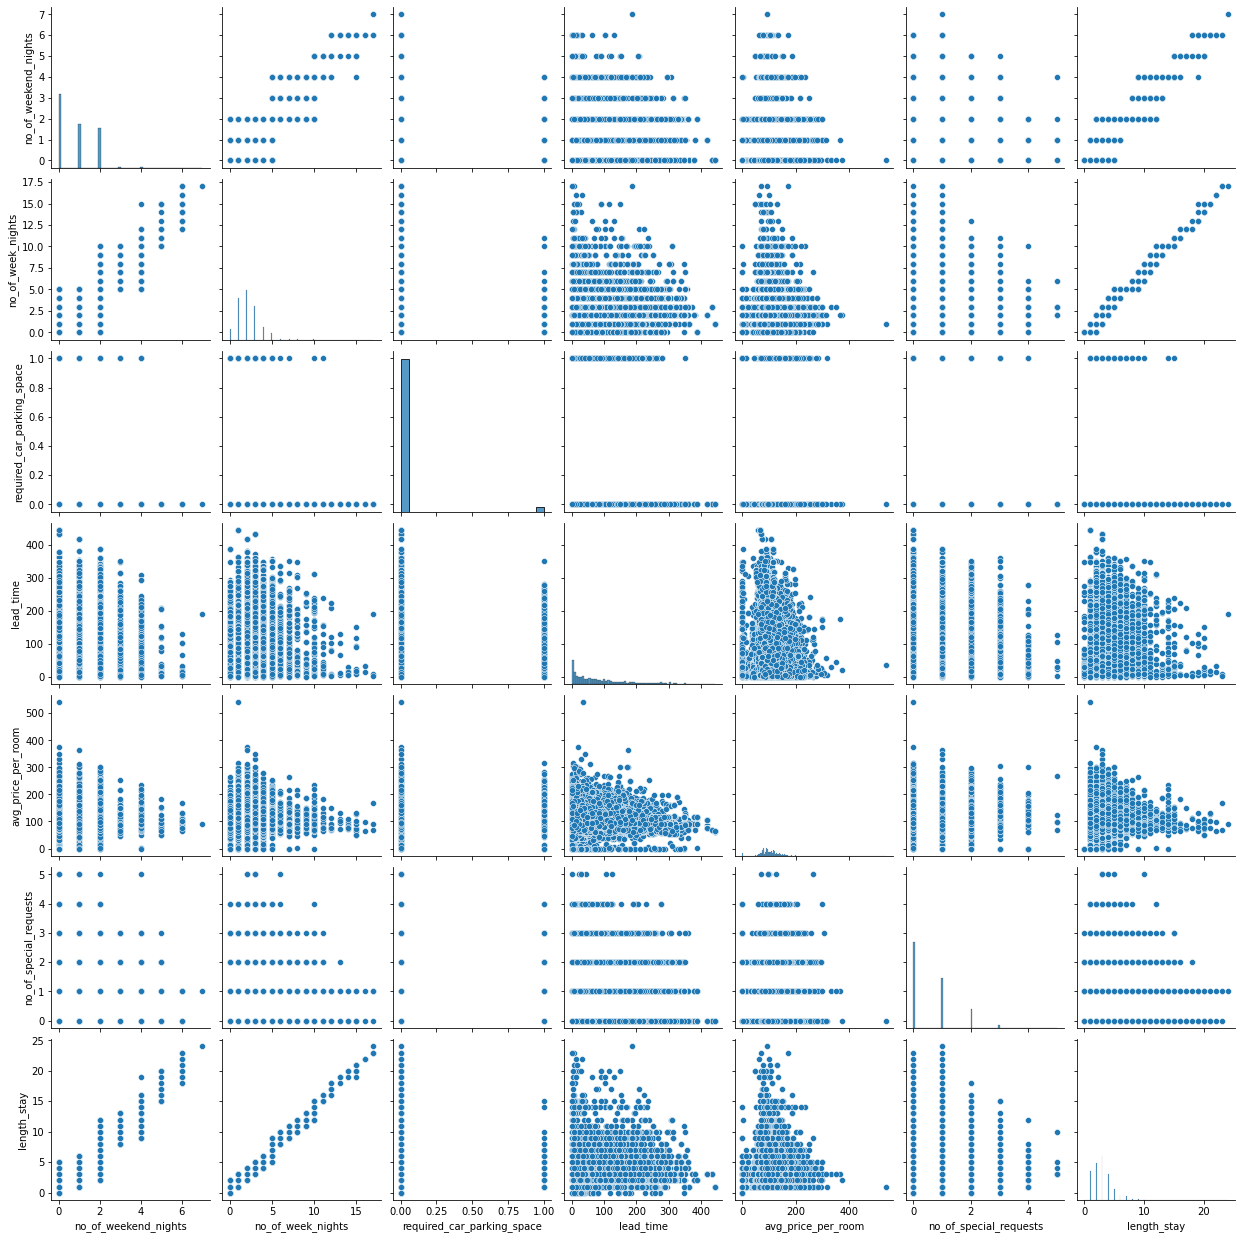

In [42]:
sns.pairplot(data[['no_of_weekend_nights','no_of_week_nights','required_car_parking_space',
                   'lead_time','avg_price_per_room','no_of_special_requests','type_of_meal_plan',
                   'room_type_reserved','market_segment_type','booking_status','length_stay']]);

## Data Preprocessing

- Missing value treatment (if needed) **no missing values**
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [43]:
data.loc[data['booking_status']=='Not_Canceled','booking_status'] = False
data.loc[data['booking_status']=='Canceled','booking_status'] = True

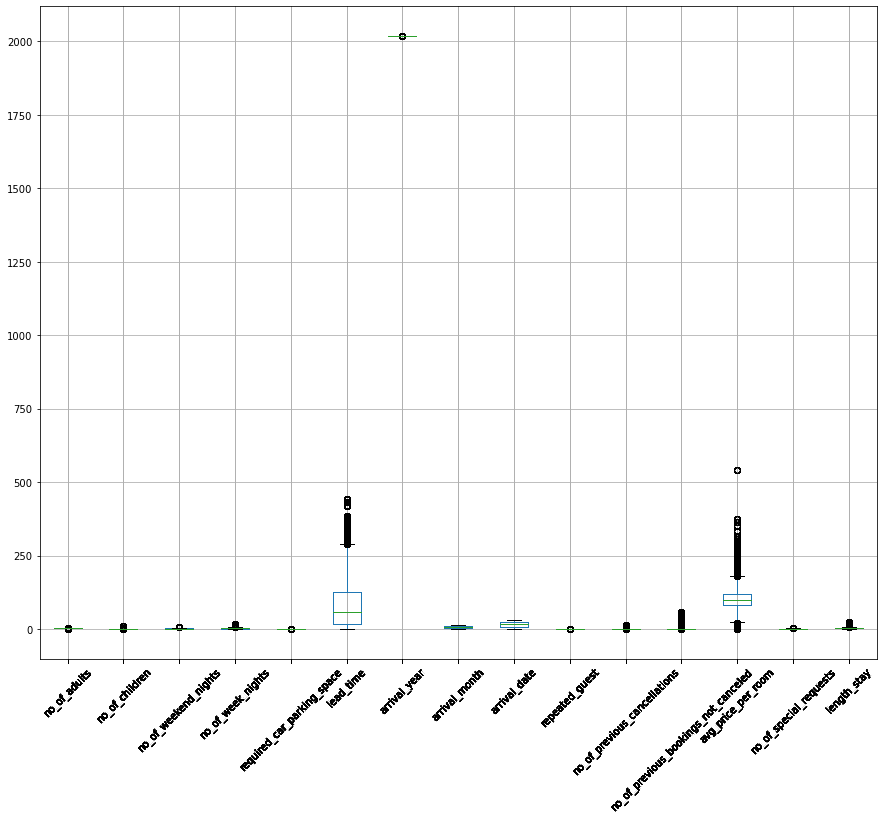

In [44]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# drop column because they were either time, or not helpful
numeric_columns.remove("arrival_year")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    data.boxplot() 

plt.xticks(rotation=45)
plt.show()

There are two heavy outlier columns, lead_time & avg_room_price. I will only treat avg_room_price as a log because I am going to bin lead time and that should handle those outliers.

In [45]:
#Solving the IQR fro avg price room
quartiles = np.quantile(data['avg_price_per_room'][data['avg_price_per_room'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers = data.loc[np.abs(data['avg_price_per_room'] - data['avg_price_per_room'].median()) > power_4iqr, 'avg_price_per_room']
outlier_powers.shape

Q1 = 80.3, Q3 = 120.0, 4*IQR = 158.8


(49,)

In [46]:
# creating a list of columns
dist_cols = [
    item for item in data.select_dtypes(include=np.number).columns 
]

plt.figure(figsize=(15, 45))
#looping the list and ploting histograms
for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=15)

plt.show()

In [47]:
data2 = data.copy()
# removing because they are close to normal
dist_cols.remove('no_of_week_nights')
dist_cols.remove('no_of_adults')
dist_cols.remove('length_stay')
dist_cols.remove('avg_price_per_room')
# removing becasue they are boolean or time related. 
dist_cols.remove('arrival_year')
dist_cols.remove('required_car_parking_space')
dist_cols.remove('arrival_date')
dist_cols.remove('arrival_month')
dist_cols.remove('repeated_guest')
# removing becasue I have a different treatment in mind
dist_cols.remove('lead_time')

In [48]:
# using log transforms on some columns
for col in dist_cols:
    data2[col + "_log"] = np.log(data2[col] + 1)

# dropping the original columns
data2.drop(dist_cols, axis=1, inplace=True)
data2.head()

no_of_adults  no_of_week_nights type_of_meal_plan  \
0             2                  2       Meal Plan 1   
1             2                  3      Not Selected   
2             1                  1       Meal Plan 1   
3             2                  2       Meal Plan 1   
4             2                  1      Not Selected   

   required_car_parking_space room_type_reserved  lead_time  arrival_year  \
0                           0        Room_Type 1        224          2017   
1                           0        Room_Type 1          5          2018   
2                           0        Room_Type 1          1          2018   
3                           0        Room_Type 1        211          2018   
4                           0        Room_Type 1         48          2018   

   arrival_month  arrival_date market_segment_type  repeated_guest  \
0             10             2             Offline               0   
1             11             6              Online               0   
2              2            28              Online               0   
3              5            20              Online               0   
4              4            11              Online               0   

   avg_price_per_room booking_status  length_stay  no_of_children_log  \
0               65.00          False            3                 0.0   
1              106.68          False            5                 0.0   
2               60.00           True            3                 0.0   
3              100.00           True            2                 0.0   
4               94.50           True            2                 0.0   

   no_of_weekend_nights_log  no_of_previous_cancellations_log  \
0                  0.693147                               0.0   
1                  1.098612                               0.0   
2                  1.098612                               0.0   
3                  0.000000                               0.0   
4                  0.693147                               0.0   

   no_of_previous_bookings_not_canceled_log  no_of_special_requests_log  
0                                       0.0                    0.000000  
1                                       0.0                    0.693147  
2                                       0.0                    0.000000  
3                                       0.0                    0.000000  
4                                       0.0                    0.000000

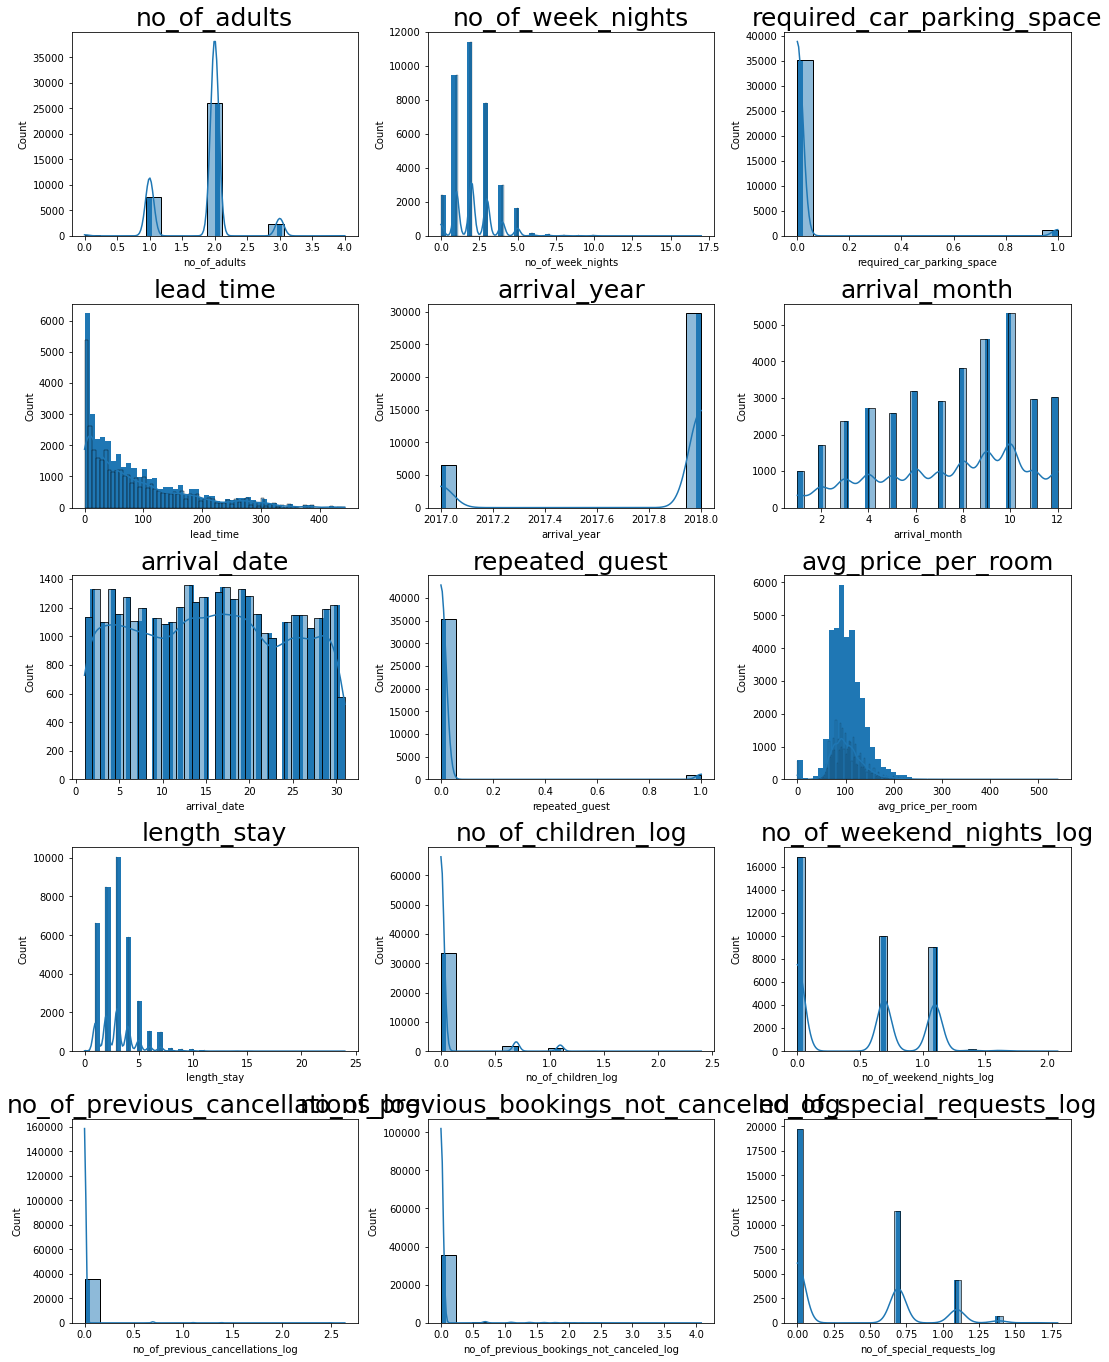

In [49]:
# viewing the distributions after the log transformation. 
dist_cols = [
    item for item in data2.select_dtypes(include=np.number).columns 
]

#  plot histogram of all numeric columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data2[dist_cols[i]], bins=50)
    sns.histplot(data=data2, x=dist_cols[i], kde=True)  
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

In [50]:
# OneHotEncoding catergorical variables
dummy_data = pd.get_dummies (
    data2,
    columns = [
        'type_of_meal_plan',
        'room_type_reserved',
        'market_segment_type',
    ],
    drop_first=True,
)
dummy_data.head()

no_of_adults  no_of_week_nights  required_car_parking_space  lead_time  \
0             2                  2                           0        224   
1             2                  3                           0          5   
2             1                  1                           0          1   
3             2                  2                           0        211   
4             2                  1                           0         48   

   arrival_year  arrival_month  arrival_date  repeated_guest  \
0          2017             10             2               0   
1          2018             11             6               0   
2          2018              2            28               0   
3          2018              5            20               0   
4          2018              4            11               0   

   avg_price_per_room booking_status  length_stay  no_of_children_log  \
0               65.00          False            3                 0.0   
1              106.68          False            5                 0.0   
2               60.00           True            3                 0.0   
3              100.00           True            2                 0.0   
4               94.50           True            2                 0.0   

   no_of_weekend_nights_log  no_of_previous_cancellations_log  \
0                  0.693147                               0.0   
1                  1.098612                               0.0   
2                  1.098612                               0.0   
3                  0.000000                               0.0   
4                  0.693147                               0.0   

   no_of_previous_bookings_not_canceled_log  no_of_special_requests_log  \
0                                       0.0                    0.000000   
1                                       0.0                    0.693147   
2                                       0.0                    0.000000   
3                                       0.0                    0.000000   
4                                       0.0                    0.000000   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                               0                               0   
1                               1                               0   
2                               0                               0   
3                               0                               0   
4                               1                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2         

In [51]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   no_of_adults                              36275 non-null  int64  
 1   no_of_week_nights                         36275 non-null  int64  
 2   required_car_parking_space                36275 non-null  int64  
 3   lead_time                                 36275 non-null  int64  
 4   arrival_year                              36275 non-null  int64  
 5   arrival_month                             36275 non-null  int64  
 6   arrival_date                              36275 non-null  int64  
 7   repeated_guest                            36275 non-null  int64  
 8   avg_price_per_room                        36275 non-null  float64
 9   booking_status                            36275 non-null  object 
 10  length_stay                       

In [52]:
dummied_cut = pd.cut(dummy_data['lead_time'], 5, labels=['lat_min','short','med','long','advanced'])
dummied_cut.head(10)

0        med
1    lat_min
2    lat_min
3        med
4    lat_min
5       long
6    lat_min
7    lat_min
8      short
9    lat_min
Name: lead_time, dtype: category
Categories (5, object): ['lat_min' < 'short' < 'med' < 'long' < 'advanced']

In [53]:
data3 = pd.merge(dummy_data, dummied_cut, left_index=True, right_index=True)

data3.head().T

0         1         2      3  \
no_of_adults                                     2         2         1      2   
no_of_week_nights                                2         3         1      2   
required_car_parking_space                       0         0         0      0   
lead_time_x                                    224         5         1    211   
arrival_year                                  2017      2018      2018   2018   
arrival_month                                   10        11         2      5   
arrival_date                                     2         6        28     20   
repeated_guest                                   0         0         0      0   
avg_price_per_room                            65.0    106.68      60.0  100.0   
booking_status                               False     False      True   True   
length_stay                                      3         5         3      2   
no_of_children_log                             0.0       0.0       0.0    0.0   
no_of_weekend_nights_log                  0.693147  1.098612  1.098612    0.0   
no_of_previous_cancellations_log               0.0       0.0       0.0    0.0   
no_of_previous_bookings_not_canceled_log       0.0       0.0       0.0    0.0   
no_of_special_requests_log                     0.0  0.693147       0.0    0.0   
type_of_meal_plan_Meal Plan 2                    0         0         0      0   
type_of_meal_plan_Meal Plan 3                    0         0         0      0   
type_of_meal_plan_Not Selected                   0         1         0      0   
room_type_reserved_Room_Type 2                   0         0         0      0   
room_type_reserved_Room_Type 3                   0         0         0      0   
room_type_reserved_Room_Type 4                   0         0         0      0   
room_type_reserved_Room_Type 5                   0         0         0      0   
room_type_reserved_Room_Type 6                   0         0         0      0   
room_type_reserved_Room_Type 7                   0         0         0      0   
market_segment_type_Complementary                0         0         0      0   
market_segment_type_Corporate                    0         0         0      0   
market_segment_type_Offline                      1         0         0      0   
market_segment_type_Online                       0         1         1      1   
lead_time_y                                    med   lat_min   lat_min    med   

                                                 4  
no_of_adults                                     2  
no_of_week_nights                                1  
required_car_parking_space                       0  
lead_time_x                                     48  
arrival_year                                  2018  
arrival_month                                    4  
arrival_date                                    11  
repeated_guest                                   0  
avg_price_per_room                            94.5  
booking_status                                True  
length_stay                                      2  
no_of_children_log                             0.0  
no_of_weekend_nights_log                  0.693147  
no_of_previous_cancellations_log               0.0  
no_of_previous_bookings_not_canceled_log       0.0  
no_of_special_requests_log                     0.0  
type_of_meal_plan_Meal Plan 2                    0  
type_of_meal_plan_Meal Plan 3                    0  
type_of_meal_plan_Not Selected                   1  
room_type_reserved_Room_Type 2                   0  
room_type_reserved_Room_Type 3                   0  
room_type_reserved_Room_Type 4                   0  
room_type_reserved_Room_Type 5                   0  
room_type_reserved_Room_Type 6                   0  
room_type_reserved_Room_Type 7                   0  
market_segment_type_Complementary                0  
market_segment_type_Corporate                    0  
market_segment_type_Offline                      0  


In [54]:
# dropping time variables and lead_time_x since it has been binned into 5 columns.
data3_5 = data3.drop(['lead_time_x','arrival_date', 'arrival_year'], axis=1)

In [55]:
data4 = pd.get_dummies (
    data3_5,
    columns = [
        'lead_time_y',  
    ],
    drop_first=True,
)
data4.head().T

0         1         2      3  \
no_of_adults                                     2         2         1      2   
no_of_week_nights                                2         3         1      2   
required_car_parking_space                       0         0         0      0   
arrival_month                                   10        11         2      5   
repeated_guest                                   0         0         0      0   
avg_price_per_room                            65.0    106.68      60.0  100.0   
booking_status                               False     False      True   True   
length_stay                                      3         5         3      2   
no_of_children_log                             0.0       0.0       0.0    0.0   
no_of_weekend_nights_log                  0.693147  1.098612  1.098612    0.0   
no_of_previous_cancellations_log               0.0       0.0       0.0    0.0   
no_of_previous_bookings_not_canceled_log       0.0       0.0       0.0    0.0   
no_of_special_requests_log                     0.0  0.693147       0.0    0.0   
type_of_meal_plan_Meal Plan 2                    0         0         0      0   
type_of_meal_plan_Meal Plan 3                    0         0         0      0   
type_of_meal_plan_Not Selected                   0         1         0      0   
room_type_reserved_Room_Type 2                   0         0         0      0   
room_type_reserved_Room_Type 3                   0         0         0      0   
room_type_reserved_Room_Type 4                   0         0         0      0   
room_type_reserved_Room_Type 5                   0         0         0      0   
room_type_reserved_Room_Type 6                   0         0         0      0   
room_type_reserved_Room_Type 7                   0         0         0      0   
market_segment_type_Complementary                0         0         0      0   
market_segment_type_Corporate                    0         0         0      0   
market_segment_type_Offline                      1         0         0      0   
market_segment_type_Online                       0         1         1      1   
lead_time_y_short                                0         0         0      0   
lead_time_y_med                                  1         0         0      1   
lead_time_y_long                                 0         0         0      0   
lead_time_y_advanced                             0         0         0      0   

                                                 4  
no_of_adults                                     2  
no_of_week_nights                                1  
required_car_parking_space                       0  
arrival_month                                    4  
repeated_guest                                   0  
avg_price_per_room                            94.5  
booking_status                                True  
length_stay                                      2  
no_of_children_log                             0.0  
no_of_weekend_nights_log                  0.693147  
no_of_previous_cancellations_log               0.0  
no_of_previous_bookings_not_canceled_log       0.0  
no_of_special_requests_log                     0.0  
type_of_meal_plan_Meal Plan 2                    0  
type_of_meal_plan_Meal Plan 3                    0  
type_of_meal_plan_Not Selected                   1  
room_type_reserved_Room_Type 2                   0  
room_type_reserved_Room_Type 3                   0  
room_type_reserved_Room_Type 4                   0  
room_type_reserved_Room_Type 5                   0  
room_type_reserved_Room_Type 6                   0  
room_type_reserved_Room_Type 7                   0  
market_segment_type_Complementary                0  
market_segment_type_Corporate                    0  
market_segment_type_Offline                      0  
market_segment_type_Online                       1  
lead_time_y_short                                0  
lead_time_y_med                                  0  


In [56]:
data4 = data4.astype(float)

In [57]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   no_of_adults                              36275 non-null  float64
 1   no_of_week_nights                         36275 non-null  float64
 2   required_car_parking_space                36275 non-null  float64
 3   arrival_month                             36275 non-null  float64
 4   repeated_guest                            36275 non-null  float64
 5   avg_price_per_room                        36275 non-null  float64
 6   booking_status                            36275 non-null  float64
 7   length_stay                               36275 non-null  float64
 8   no_of_children_log                        36275 non-null  float64
 9   no_of_weekend_nights_log                  36275 non-null  float64
 10  no_of_previous_cancellations_log  

In [58]:
# Using the SCIEM method I will split the train test data first.
X = data4.drop("booking_status" , axis=1)
y = data4.pop("booking_status")

# adding a contstant to X variable
X = add_constant(X)

In [59]:
# Train/Test Split 70/30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [60]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


In [61]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0.0    0.670644
1.0    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0.0    0.676376
1.0    0.323624
Name: booking_status, dtype: float64


In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   const                                     25392 non-null  float64
 1   no_of_adults                              25392 non-null  float64
 2   no_of_week_nights                         25392 non-null  float64
 3   required_car_parking_space                25392 non-null  float64
 4   arrival_month                             25392 non-null  float64
 5   repeated_guest                            25392 non-null  float64
 6   avg_price_per_room                        25392 non-null  float64
 7   length_stay                               25392 non-null  float64
 8   no_of_children_log                        25392 non-null  float64
 9   no_of_weekend_nights_log                  25392 non-null  float64
 10  no_of_previous_cancellations_l

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(
data4.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

<AxesSubplot:>

In [64]:
sns.pairplot(data4[['no_of_adults',
 'required_car_parking_space',
 'arrival_month',
 'repeated_guest',
 'avg_price_per_room',
 'length_stay',
 'no_of_children_log',
 'no_of_previous_cancellations_log',
 'no_of_previous_bookings_not_canceled_log',
 'no_of_special_requests_log',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online',
 'lead_time_y_short',
 'lead_time_y_med',
 'lead_time_y_long',
 'lead_time_y_advanced']]);

### EDA Insights
- Late Summer / Early Fall (AUG – OCT) is the busiest time of the year for the hotel chain. 
- Nearly 2/3 of bookings come from online sources.
- Typically, rooms rent for around £100 plus or minus 25.
- Of 36275 room rentals 545 were free of charge over the course of the survey.
- Online booked rooms have the highest cost of booking. 
- Repeated guest rarely cancel, meaning the level of satisfaction that guest is likely very high. 
- Guest who make special request for their stay, are significantly less likely to cancel the reservation. 
- 72% of adults who book rooms have another adult staying with them. 
- Children are rare at the hotels, as 92.6% of booking don’t include children in the rooms. 
- 52.6% of bookings include at least one weekend night. 
- The hotel rarely has long stay guests.
- Parking is not a factor almost all the guest, I wouldn’t bother promoting it. 
- Room types though nice to have are largely unneeded, 90% of room type booked are type1 & type4.
- Breakfast only plan is the most popular, and the ‘FULL BOARD’ plan is almost never booked. 
- The further out in terms of day that rooms are booked the more likely they are to be canceled.
- The client has a robust pricing structure.
-


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [65]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                       326.141919
no_of_adults                                  1.346659
no_of_week_nights                           100.277464
required_car_parking_space                    1.041578
arrival_month                                 1.051511
repeated_guest                                3.340040
avg_price_per_room                            1.936037
length_stay                                 146.442538
no_of_children_log                            1.866322
no_of_weekend_nights_log                     34.428764
no_of_previous_cancellations_log              1.597137
no_of_previous_bookings_not_canceled_log      3.508907
no_of_special_requests_log                    1.267959
type_of_meal_plan_Meal Plan 2                 1.217525
type_of_meal_plan_Meal Plan 3                 1.025316
type_of_meal_plan_Not Selected                1.236534
room_type_reserved_Room_Type 2                1.090666
room_type_reserved_Room_Type 3                1.003

In [66]:
#dropping the number of weekend & week nights because I have combined them into one & market segements because they all have large multi values
X_train1 = X_train.drop(['no_of_weekend_nights_log',
                         'no_of_week_nights',
                         'market_segment_type_Online',
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        'market_segment_type_Complementary'],
                       axis=1)

## Building a Logistic Regression model

In [67]:
logit = sm.Logit(y_train, X_train1.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463427
         Iterations 10


In [68]:
# print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Fri, 14 Jan 2022   Pseudo R-squ.:                  0.2687
Time:                        18:37:31   Log-Likelihood:                -11767.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6818      0.098    -37.650      0.000      -3.873      -3.490
no_of_adults                             

In [69]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                       29.389432
no_of_adults                                 1.279036
required_car_parking_space                   1.037343
arrival_month                                1.045906
repeated_guest                               3.216850
avg_price_per_room                           1.583496
length_stay                                  1.076888
no_of_children_log                           1.855492
no_of_previous_cancellations_log             1.576794
no_of_previous_bookings_not_canceled_log     3.445330
no_of_special_requests_log                   1.133817
type_of_meal_plan_Meal Plan 2                1.134531
type_of_meal_plan_Meal Plan 3                1.018636
type_of_meal_plan_Not Selected               1.108819
room_type_reserved_Room_Type 2               1.079517
room_type_reserved_Room_Type 3               1.000877
room_type_reserved_Room_Type 4               1.317003
room_type_reserved_Room_Type 5               1.013508
room_type_rese

In [70]:
# test performance
pred_train = lg.predict(X_train1) > 0.5
pred_train = np.round(pred_train)

In [71]:
X_train2 = X_train1.drop(['room_type_reserved_Room_Type 3'], axis=1)
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   const                                     25392 non-null  float64
 1   no_of_adults                              25392 non-null  float64
 2   required_car_parking_space                25392 non-null  float64
 3   arrival_month                             25392 non-null  float64
 4   repeated_guest                            25392 non-null  float64
 5   avg_price_per_room                        25392 non-null  float64
 6   length_stay                               25392 non-null  float64
 7   no_of_children_log                        25392 non-null  float64
 8   no_of_previous_cancellations_log          25392 non-null  float64
 9   no_of_previous_bookings_not_canceled_log  25392 non-null  float64
 10  no_of_special_requests_log    

In [72]:
logit = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463428
         Iterations 10


In [73]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Fri, 14 Jan 2022   Pseudo R-squ.:                  0.2687
Time:                        18:37:34   Log-Likelihood:                -11767.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6818      0.098    -37.651      0.000      -3.873      -3.490
no_of_adults                             

In [74]:
X_train3 = X_train2.drop(['no_of_previous_bookings_not_canceled_log'], axis=1)

In [75]:
logit = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463479
         Iterations 9


In [76]:
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 14 Jan 2022   Pseudo R-squ.:                  0.2686
Time:                        18:37:34   Log-Likelihood:                -11769.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.6853      0.098    -37.686      0.000      -3.877      -3.494
no_of_adults                         0.2328      0.035      6.633

In [77]:
# let's check the VIF of the predictors again to see if any Multicollinearity persist
vif_series = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                               29.239515
no_of_adults                         1.276452
required_car_parking_space           1.036585
arrival_month                        1.044675
repeated_guest                       1.552463
avg_price_per_room                   1.578995
length_stay                          1.076638
no_of_children_log                   1.855384
no_of_previous_cancellations_log     1.426094
no_of_special_requests_log           1.128277
type_of_meal_plan_Meal Plan 2        1.134291
type_of_meal_plan_Meal Plan 3        1.018576
type_of_meal_plan_Not Selected       1.108682
room_type_reserved_Room_Type 2       1.079477
room_type_reserved_Room_Type 4       1.316395
room_type_reserved_Room_Type 5       1.012609
room_type_reserved_Room_Type 6       1.832724
room_type_reserved_Room_Type 7       1.071514
lead_time_y_short                    1.105261
lead_time_y_med                      1.091919
lead_time_y_long                     1.122907
lead_time_y_advanced

In [78]:
X_train4 = X_train3.drop(['room_type_reserved_Room_Type 2'], axis=1)

In [79]:
logit = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463500
         Iterations 9


In [80]:
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Fri, 14 Jan 2022   Pseudo R-squ.:                  0.2686
Time:                        18:37:36   Log-Likelihood:                -11769.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.6755      0.097    -37.773      0.000      -3.866      -3.485
no_of_adults                         0.2313      0.035      6.592

In [81]:
X_train5 = X_train4.drop(['room_type_reserved_Room_Type 4'], axis=1)

In [82]:
logit = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463522
         Iterations 9


In [83]:
print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 14 Jan 2022   Pseudo R-squ.:                  0.2686
Time:                        18:37:36   Log-Likelihood:                -11770.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.7035      0.094    -39.515      0.000      -3.887      -3.520
no_of_adults                         0.2398      0.034      7.023

## Model performance evaluation

In [84]:
# converting coefficients to odds
odds = np.exp(lg5.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train5.columns, columns=["odds"]).T

const  no_of_adults  required_car_parking_space  arrival_month  \
odds  0.024636      1.271005                    0.234579       0.935032   

      repeated_guest  avg_price_per_room  length_stay  no_of_children_log  \
odds        0.051575            1.023344     1.116331            1.749625   

      no_of_previous_cancellations_log  no_of_special_requests_log  \
odds                           2.60091                    0.147237   

      type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
odds                       0.697598                       5.631328   

      type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 5  \
odds                        2.301302                        0.387484   

      room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
odds                        0.329734                        0.156016   

      lead_time_y_short  lead_time_y_med  lead_time_y_long  \
odds           3.727461        17.514826         21.105724   

      lead_time_y_advanced  
odds             98.170565

In [85]:
# finding the percentage change
perc_change_odds = (np.exp(lg5.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train3.columns, columns=["change_odds%"]).T

const  no_of_adults  required_car_parking_space  \
change_odds% -97.53635     27.100515                  -76.542091   

              arrival_month  repeated_guest  avg_price_per_room  length_stay  \
change_odds%      -6.496819      -94.842473             2.33444      11.6331   

              no_of_children_log  no_of_previous_cancellations_log  \
change_odds%           74.962538                        160.091028   

              no_of_special_requests_log  type_of_meal_plan_Meal Plan 2  \
change_odds%                  -85.276282                     -30.240187   

              type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
change_odds%                     463.132781                       130.13023   

              room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
change_odds%                             NaN                             NaN   

              room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
change_odds%                      -61.251587                      -67.026611   

              room_type_reserved_Room_Type 7  lead_time_y_short  \
change_odds%                      -84.398434          272.74612   

              lead_time_y_med  lead_time_y_long  lead_time_y_advanced  
change_odds%       1651.48264        2010.57241             9717.0565

In [86]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train5.astype(float))
lg3 = logit.fit()

pred_train4 = lg5.predict(X_train5)
pred_train4 = np.round(pred_train4)

Optimization terminated successfully.
         Current function value: 0.463522
         Iterations 9


## Final Model Summary

In [87]:
# another confusion matrix
cm = confusion_matrix(y_train, pred_train4)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [88]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))

Accuracy on training set :  0.7811515437933207


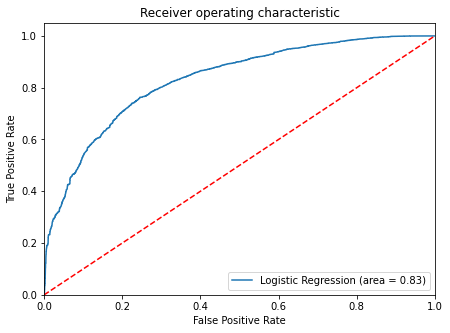

In [89]:
logit_roc_auc_train = roc_auc_score(y_train, lg5.predict(X_train5))
fpr, tpr, thresholds = roc_curve(y_train, lg5.predict(X_train5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [90]:
# dropping variables from test set as well which were dropped from training set
X_test1 = X_test.drop([ 'no_of_weekend_nights_log',
                         'no_of_week_nights',
                         'market_segment_type_Online',
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        'market_segment_type_Complementary',
                       'room_type_reserved_Room_Type 3',
                       'room_type_reserved_Room_Type 4',
                       'no_of_previous_bookings_not_canceled_log',
                       'room_type_reserved_Room_Type 2'
                      
                     ], axis=1)

In [91]:
pred_test = lg5.predict(X_test1) > 0.5
pred_test = np.round(pred_test)
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))
print("Accuracy on test set : ", accuracy_score(y_test, pred_test))


Accuracy on training set :  0.7811515437933207
Accuracy on test set :  0.7846182118901038


## Building a Decision Tree model

In [92]:
tree_data = dummy_data.astype(float)

In [93]:
tree_data = tree_data.drop(['arrival_date','arrival_year','no_of_week_nights',
'no_of_weekend_nights_log'  ], axis=1)

In [94]:
X = tree_data.drop("booking_status" , axis=1)
y = tree_data.pop("booking_status")

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

- using a simplfied data set for the tree

In [96]:
# building a decision tree using the dtclassifier function
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [97]:
#scoring the accuracy on train & test data
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.9924385633270322
Accuracy on test set :  0.8585867867315997


In [98]:
# checking the positive outcomes
y.sum(axis = 0)

11885.0

- the tree scores very well at accuracy, it captures most of the data.
- with 11885 prdictions of cancellation and actual of 11989 this isn't a good model. 
- Since we want to avoid cancellations we will use recall to find data that will help reduce that number overall. 

In [99]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [100]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [101]:
# another confusion matrix
make_confusion_matrix(dTree,y_test)

In [102]:
# check the recall on the train and test.
get_recall_score(dTree)

Recall on training set :  0.9817051297381323
Recall on test set :  0.7921635434412265


In [103]:
the_features = list(X.columns)
print(the_features)

['no_of_adults', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'avg_price_per_room', 'length_stay', 'no_of_children_log', 'no_of_previous_cancellations_log', 'no_of_previous_bookings_not_canceled_log', 'no_of_special_requests_log', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


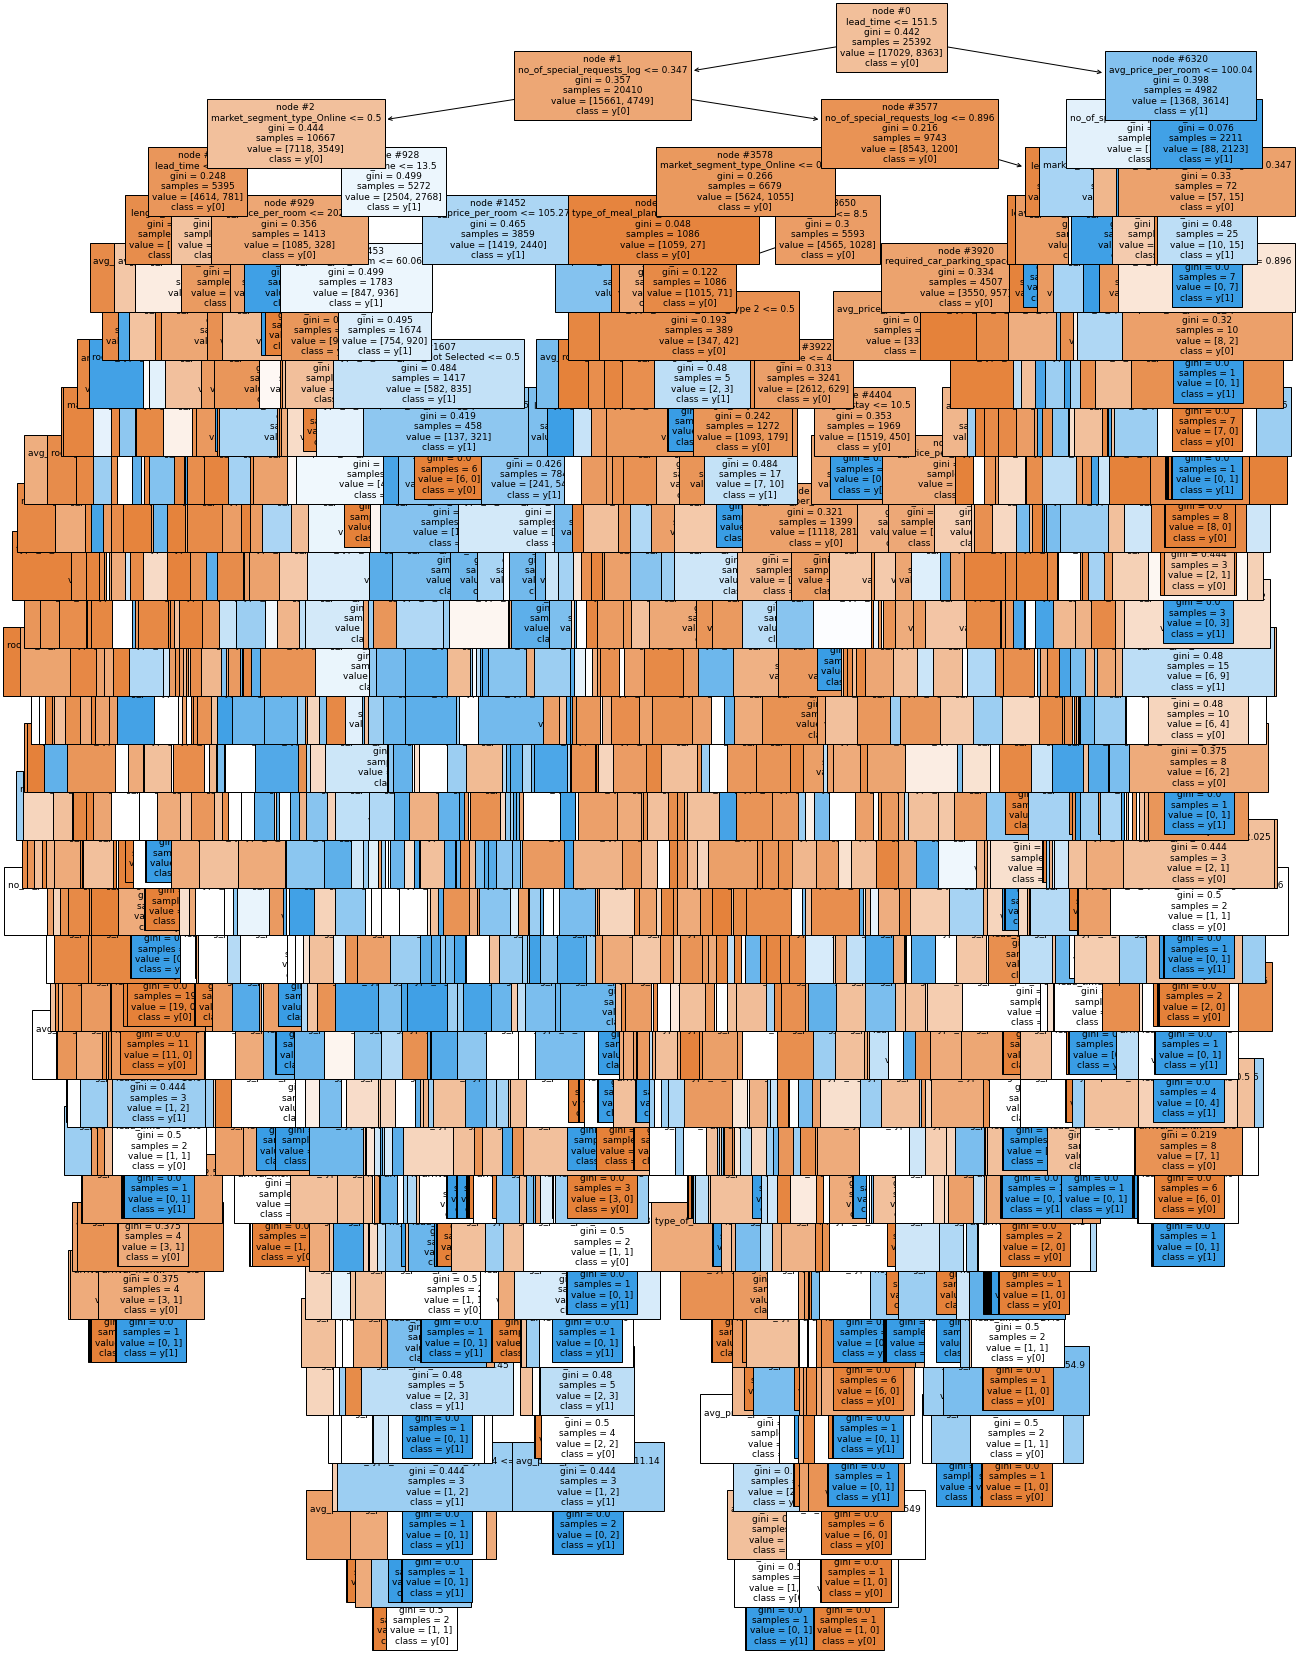

In [137]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [105]:
print(tree.export_text(dTree,feature_names=the_features,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests_log <= 0.35
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- length_stay <= 5.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |   |--- arrival_month <= 5.50
|   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 62.00
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 57.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [15.00, 0.00] class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  57.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  62.00
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 151.59
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8

In [106]:
# checking out what variables are being prioritized by the model.

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                               Imp
lead_time                                 0.397083
avg_price_per_room                        0.207281
market_segment_type_Online                0.092752
arrival_month                             0.084426
length_stay                               0.073260
no_of_special_requests_log                0.068314
no_of_adults                              0.029704
type_of_meal_plan_Not Selected            0.011106
room_type_reserved_Room_Type 4            0.008201
required_car_parking_space                0.007376
no_of_children_log                        0.005896
type_of_meal_plan_Meal Plan 2             0.004562
market_segment_type_Offline               0.003515
room_type_reserved_Room_Type 2            0.002241
room_type_reserved_Room_Type 5            0.001711
room_type_reserved_Room_Type 6            0.000748
market_segment_type_Corporate             0.000693
repeated_guest                            0.000471
room_type_reserved_Room_Type 7 

In [107]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Prune the Model

In [108]:
# Pre prune the model with max depth hyperparameter
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [109]:
# another confusion matrix
make_confusion_matrix(dTree1, y_test)

In [110]:
# The accuracy on the pre pruned tree.
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Check the recall with the get_recall_score user defined function
get_recall_score(dTree1)

Accuracy on training set :  0.7844202898550725
Accuracy on test set :  0.7913259211614444
Recall on training set :  0.7315556618438359
Recall on test set :  0.7385008517887564


- with imporved closeness in the training and testing accuracy we have successfully eliminated most of the noise from the first model (dTree)
- Having the accuracy up to 78/79% is also an improvment. 
- Also very close with the recall metric, making this a much better model already than the first model. 

In [111]:
# Let's see the pre pruned tree
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [112]:
print(tree.export_text(dTree1,feature_names=the_features,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests_log <= 0.35
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4614.00, 781.00] class: 0.0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2504.00, 2768.00] class: 1.0
|   |--- no_of_special_requests_log >  0.35
|   |   |--- no_of_special_requests_log <= 0.90
|   |   |   |--- weights: [5624.00, 1055.00] class: 0.0
|   |   |--- no_of_special_requests_log >  0.90
|   |   |   |--- weights: [2919.00, 145.00] class: 0.0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests_log <= 0.35
|   |   |   |--- weights: [694.00, 1242.00] class: 1.0
|   |   |--- no_of_special_requests_log >  0.35
|   |   |   |--- weights: [586.00, 249.00] class: 0.0
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [31.00, 2108.00] class: 1.0
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [57.00, 15.00] 

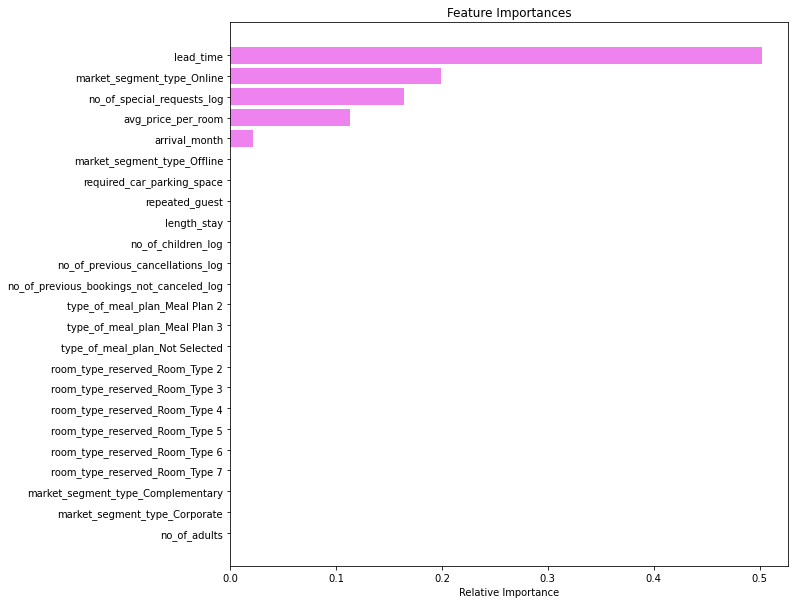

In [113]:
# Looking at the feature importances of this model
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### Let's use GridSearch to hyperparameter tune the model

In [114]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# scoring function used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

- The estimator has a given some new parameters to run

    -max_depth=3
    -max_leaf_nodes_nodes=5
    -min_impurity_decrease=.001
    -random_state=1

In [115]:
# run the estimator in a confusion matrix
make_confusion_matrix(estimator,y_test)

In [116]:
# The accuracy on the estimator tree.
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Check the recall with the get_recall_score user defined function
get_recall_score(dTree1)

Accuracy on training set :  0.7694943289224953
Accuracy on test set :  0.7719378847744188
Recall on training set :  0.7315556618438359
Recall on test set :  0.7385008517887564


- The estimator is not much different than the pre-pruned tree, in fact a little worse on the accuracy metrics from these numbers

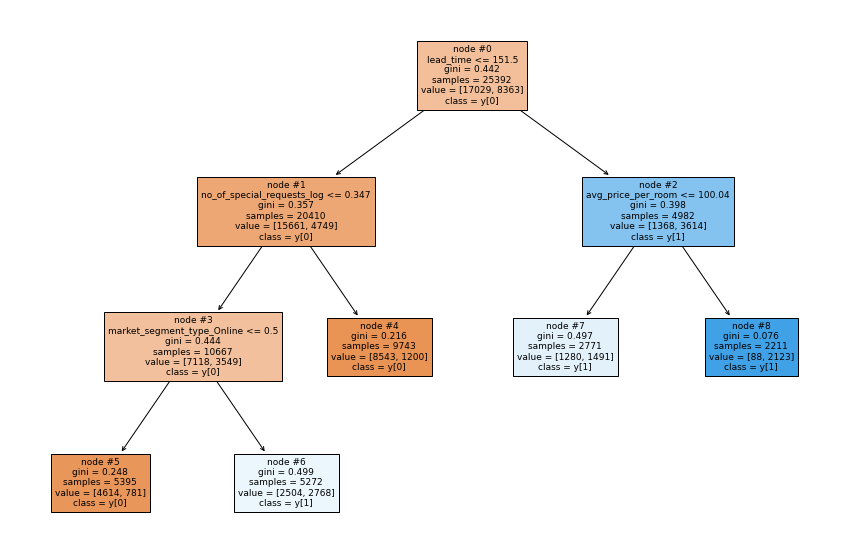

In [117]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

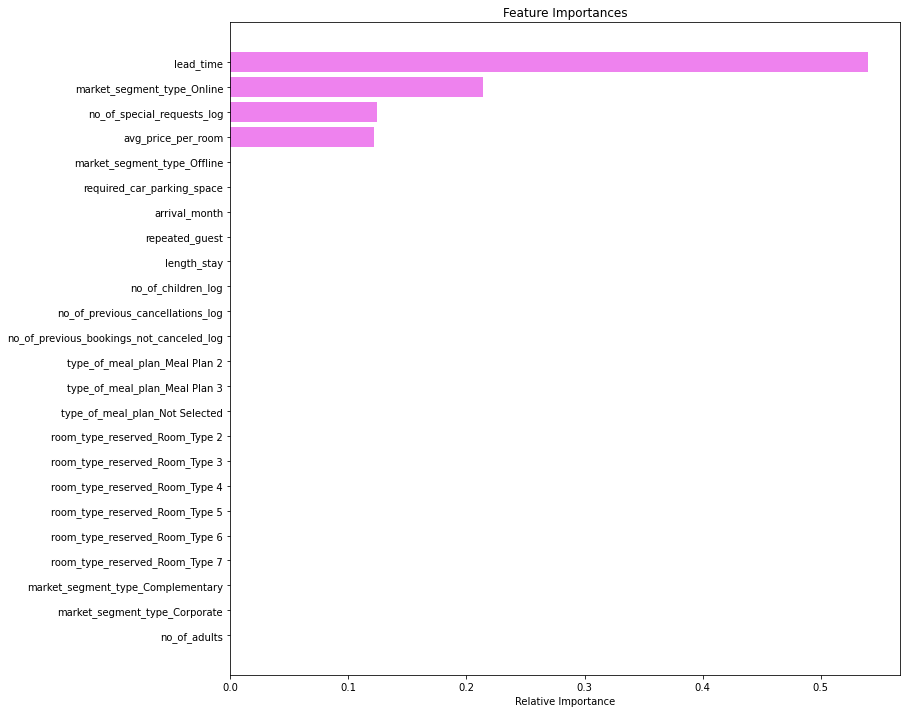

In [118]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- this is an even simplier model than the previous two gernerated

##### Cost Complexity Pruning

-Still looking for Recall not accurancy so we loook at the DT Classifier

In [119]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [120]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.009478
1     0.000000e+00    0.009478
2     0.000000e+00    0.009478
3     4.688391e-07    0.009478
4     5.329960e-07    0.009479
...            ...         ...
1508  6.665684e-03    0.286897
1509  1.304480e-02    0.299942
1510  1.725993e-02    0.317202
1511  2.399048e-02    0.365183
1512  7.657789e-02    0.441761

[1513 rows x 2 columns]

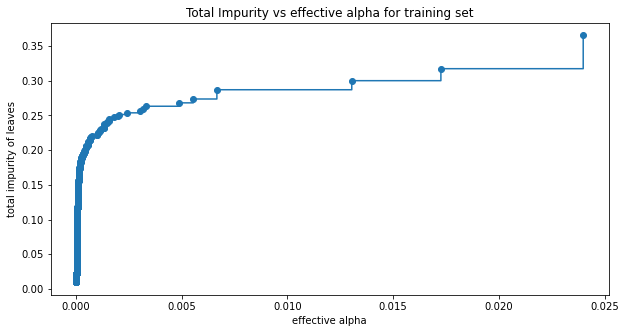

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [122]:
#Decisiion Tree calssifier for every alpha 
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0765778947737134


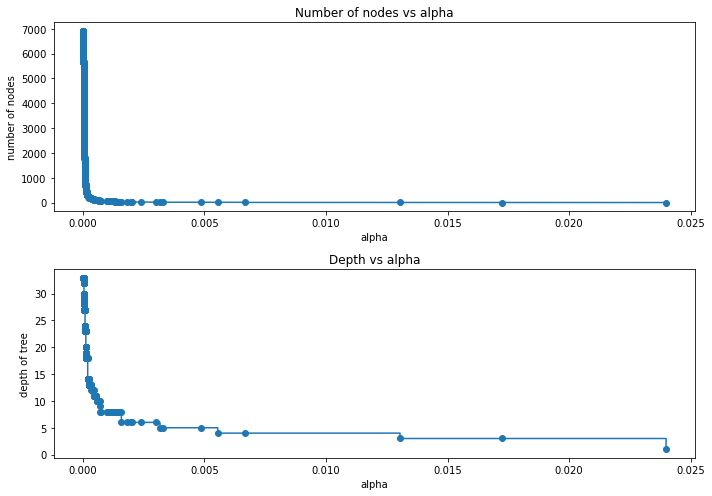

In [123]:

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- Acc v Alpha in the training & testing sets

In [124]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

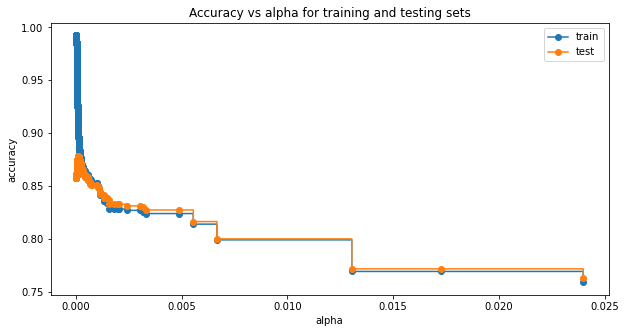

In [125]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [126]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=9.904212140385933e-05, random_state=1)
Training accuracy of best model:  0.90544265910523
Test accuracy of best model:  0.8783423688321235


- Since I am looking for recall we will 

In [127]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [128]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

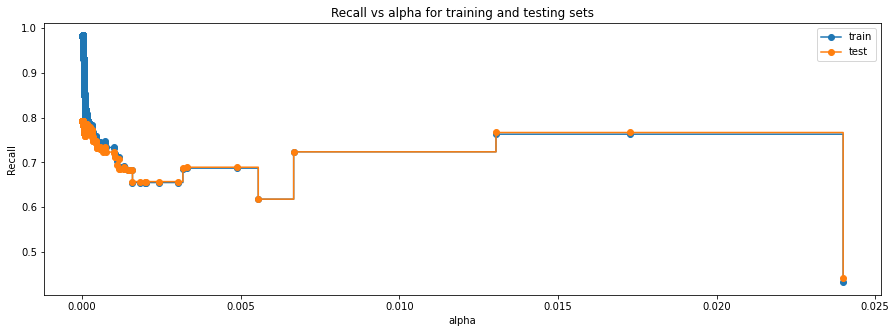

In [129]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

- looks like the best model is at .005 

In [130]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.450465588461807e-05, random_state=1)


In [131]:
#another confusion matrix
make_confusion_matrix(best_model,y_test)

In [132]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9790744947985173
Recall on test set :  0.7935831913685406


In [133]:
# plot the additional tree
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

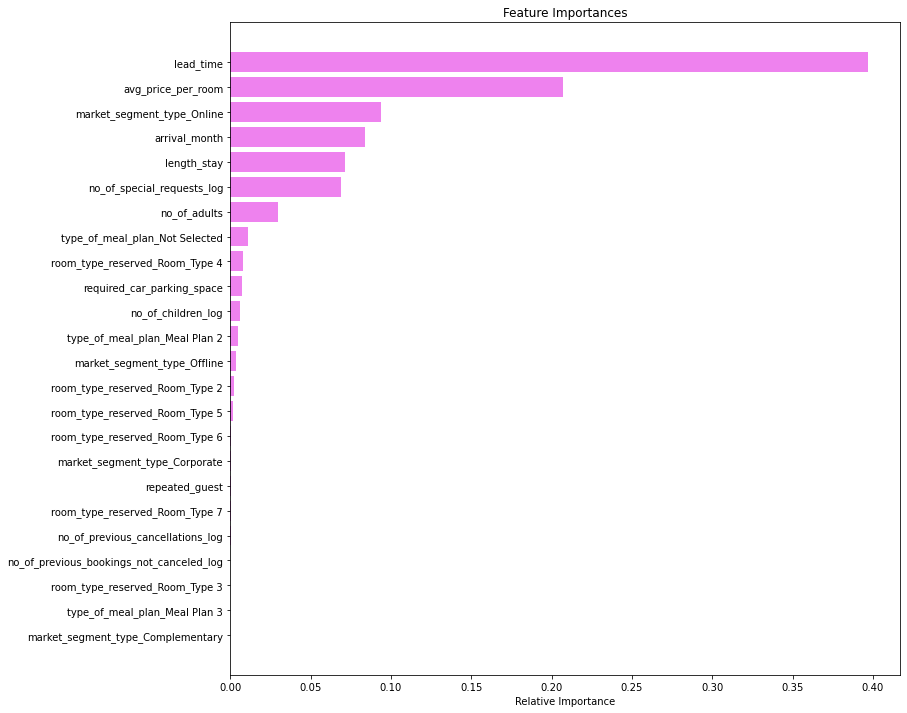

In [134]:
# showing what metrics this model used
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [135]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[.981,.732,.732,.979], 'Test_Recall':[.792,.739,.739,.794]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                  Initial decision tree model         0.981        0.792
1  Decision tree with restricted maximum depth         0.732        0.739
2    Decision treee with hyperparameter tuning         0.732        0.739
3              Decision tree with post-pruning         0.979        0.794

- The trees with restricted maximum tuning and hyperparameter tuning performed the best while reducing overfitting. I would submit one those the model to the client. 

## Actionable Insights and Recommendations

The three most important variables in terms of cancellations were the lead time, meaning how far in advance they booked the room(s), special request for the stay, and average price of the room. 
Rooms booked in advance of 151 days (5 months) or less were much less likely to cancel the reservation. Those who made a special request on top of that were very unlikely to cancel.  This I believe is an opportunity. 
Rooms booked over 151 days were more likely to cancel. Price was the determining factor for those cancellations. As the likelihood of a cancelation was increased if the room was priced over 100.04 Euros. Leading me to believe that booked early and then subsequently found a better deal. 

### My Recommendations 
- Offer your best room rates before 5 months ahead. After that you may be able to increase your prices slightly and increase profit. 
- Require a nonrefundable deposit on all rooms in advance of over 5 months.
- Replace the ‘Full Board’ option on your booking with a menu of special requests available, instead of waiting for them to come in sell them even if they are no charge.  
	- VIP a champagne toast at sunset your first night.
	- Room upgrades
	- WiFi
	- Laundry Bag
	- Slippers
- I believe that seasonal high prices may peak to early in OCT. 